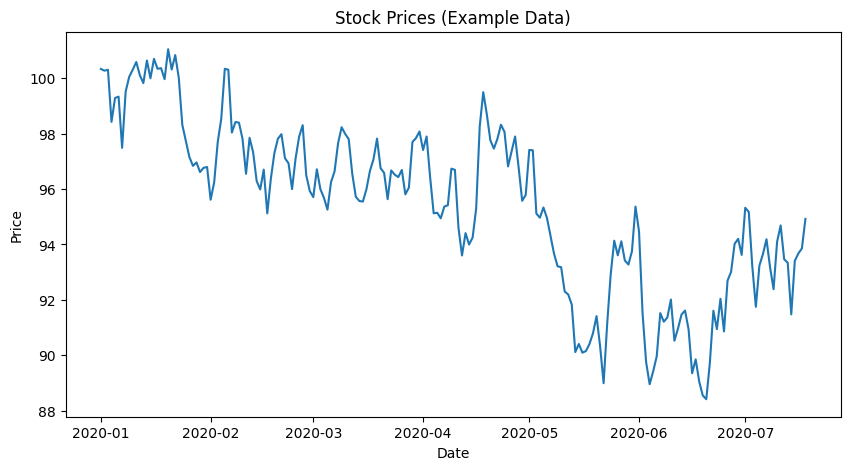

ADF Statistic: -2.0492113462727835
p-value: 0.26542085878699684
 Data is Non-Stationary
ADF Statistic: -9.790881027538347
p-value: 6.358433730118199e-17
 Data is Stationary


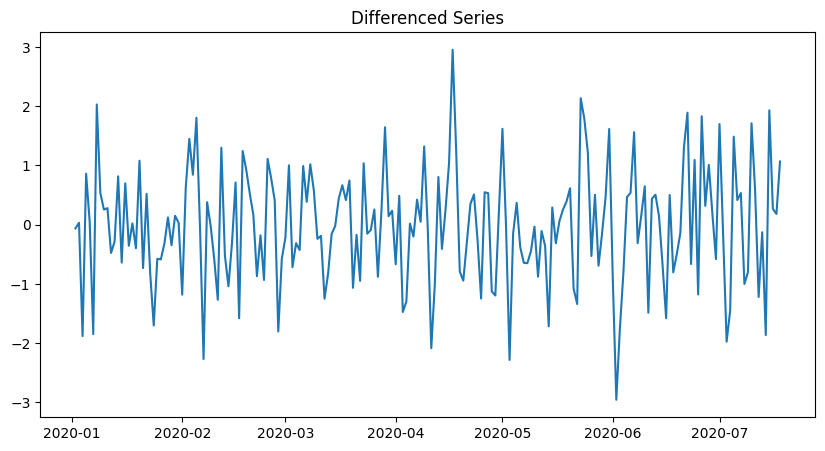

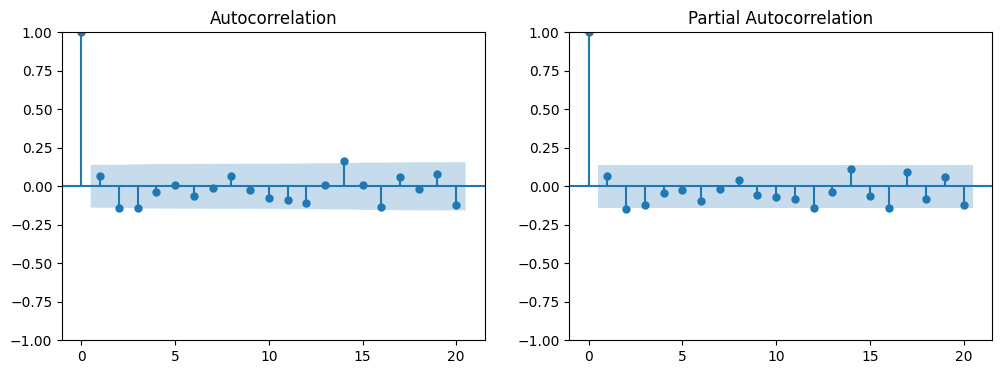

c:\Users\kirut\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kirut\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kirut\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  160
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -215.443
Date:                Wed, 01 Oct 2025   AIC                            436.886
Time:                        18:22:37   BIC                            446.092
Sample:                    01-01-2020   HQIC                           440.624
                         - 06-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2385      0.411     -0.580      0.562      -1.044       0.567
ma.L1          0.4084      0.395      1.033      0.302      -0.366       1.183
sigma2         0.8797      0.099      8.880      0.0

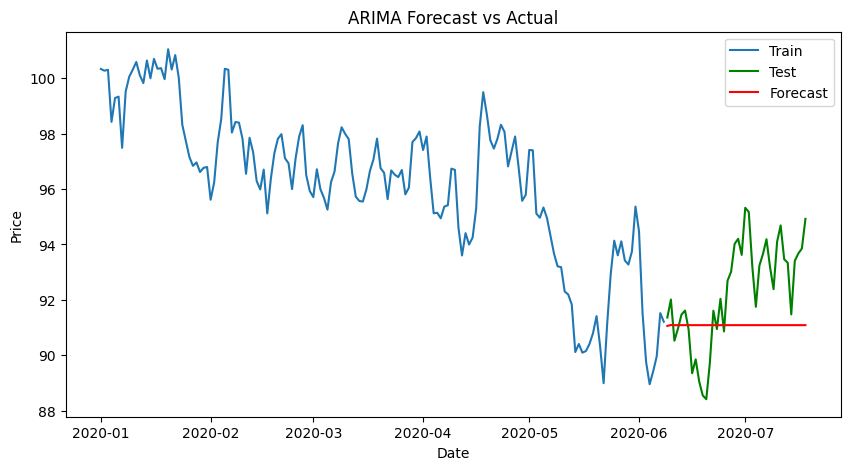

In [2]:
# Task 8: Time Series Forecasting with ARIMA
# Tools: Python, statsmodels, pandas, matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# ---- 1. Load Data ----
# Example dataset: random stock-like prices (replace with CSV if you have real stock data)
dates = pd.date_range(start="2020-01-01", periods=200, freq="D")
prices = np.cumsum(np.random.randn(200)) + 100  # random walk like stock prices
df = pd.DataFrame({"Date": dates, "Price": prices})
df.set_index("Date", inplace=True)

# ---- 2. Plot the Data ----
plt.figure(figsize=(10,5))
plt.plot(df['Price'])
plt.title("Stock Prices (Example Data)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# ---- 3. Check Stationarity (ADF Test) ----
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print(" Data is Stationary")
    else:
        print(" Data is Non-Stationary")

adf_test(df['Price'])

# ---- 4. Differencing (if needed to make stationary) ----
df_diff = df['Price'].diff().dropna()
adf_test(df_diff)

plt.figure(figsize=(10,5))
plt.plot(df_diff)
plt.title("Differenced Series")
plt.show()

# ---- 5. ACF & PACF Plots ----
fig, ax = plt.subplots(1,2, figsize=(12,4))
sm.graphics.tsa.plot_acf(df_diff, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_diff, lags=20, ax=ax[1])
plt.show()

# ---- 6. Train/Test Split ----
train_size = int(len(df) * 0.8)
train, test = df['Price'][:train_size], df['Price'][train_size:]

# ---- 7. Fit ARIMA Model ----
# Simple parameters (p=1, d=1, q=1) - you can tune based on ACF/PACF
model = sm.tsa.ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# ---- 8. Forecast ----
forecast = model_fit.forecast(steps=len(test))

# ---- 9. Plot Forecast vs Actual ----
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='green')
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
